<a href="https://colab.research.google.com/github/soldkin/ai-and-ml/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 2 ДИСЦИПЛИНЫ «Искусственный интеллект и машинное обучение»

НА ТЕМУ: Исследовательский анализ данных

Выполнил: Солдаткин Александр

Группа ПИН-б-о-22-1

# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [ ]:
import pandas as pd

from google.colab import files

import seaborn as sns

# Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

Saving cars.csv to cars.csv


# Считываем файл в DataFrame



метод .read_csv(path,delimiter)

In [ ]:
df = pd.read_csv('cars.csv', delimiter = ',')

In [ ]:
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# Информация о DataFrame


Метод .info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  int64  
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.8+ MB


# Поиск Дубликатов



методы .duplicated() и .sum()

In [ ]:
df.duplicated().sum()

3743

**Удаление дубликатов**

Методы .drop_duplicates() и .reset_index()

In [ ]:
DF = df.drop_duplicates()

DF = DF.reset_index(drop=True)

DF

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# Индексация

**Визуализация части DataFrame**

Метод .head(n) - первые n строк

In [ ]:
DF.head(6)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
5,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0


Метод .tail(n) - последние n строк

In [ ]:
DF.tail(9)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
37255,Renault,Megane,2011,Sedan,145000.0,1500.0,Diesel,Automatic,6200.0
37256,Toyota,Auris,2007,Hatchback,222111.0,1400.0,Diesel,Automatic,4444.0
37257,Skoda,Superb,2016,Cabriolet,78900.0,2000.0,Petrol,Automatic,21000.0
37258,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0
37263,Renault,Grand Scenic,2006,Minivan,300000.0,1500.0,Diesel,Manual,4000.0


**Индексация**

аттрибут .loc[строки, столбцы]

In [ ]:
DF.loc[1437,'Transmission']

'Automatic'

In [ ]:
DF.loc[:,'Transmission']

,Transmission
0,Automatic
1,Manual
2,Manual
3,Manual
4,Manual
...,...
37259,Manual
37260,Manual
37261,Manual
37262,Manual


In [ ]:
DF.loc[:,['Transmission']].head(5)

,Transmission
0,Automatic
1,Manual
2,Manual
3,Manual
4,Manual


In [ ]:
DF.loc[:,['Transmission','Year']].head(5)

,Transmission,Year
0,Automatic,2011
1,Manual,2014
2,Manual,1998
3,Manual,2012
4,Manual,2006


In [ ]:
DF.loc[:,'Make':'Style'].head(5)

,Make,Model,Year,Style
0,Toyota,Prius,2011,Hatchback
1,Renault,Grand Scenic,2014,Universal
2,Volkswagen,Golf,1998,Hatchback
3,Renault,Laguna,2012,Universal
4,Opel,Astra,2006,Universal


In [ ]:
DF.loc[69,:]

,69
Make,Honda
Model,CR-V
Year,2002
Style,Universal
Distance,275100.0
Engine_capacity(cm3),2000.0
Fuel_type,Petrol
Transmission,Manual
Price(euro),5900.0


In [ ]:
DF.loc[69:69,:]

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
69,Honda,CR-V,2002,Universal,275100.0,2000.0,Petrol,Manual,5900.0


In [ ]:
DF.loc[322:1437,:]

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
322,Skoda,Octavia,2010,Universal,1.0,1400.0,Petrol,Manual,5350.0
323,Mercedes,E Class,2016,Sedan,161024.0,2200.0,Diesel,Automatic,26950.0
324,Honda,Civic,2006,Hatchback,195000.0,1400.0,Petrol,Manual,5400.0
325,Ford,Fusion,2015,Sedan,124000.0,2000.0,Plug-in Hybrid,Automatic,11499.0
326,Ford,Fusion,2003,Hatchback,330000.0,1400.0,Diesel,Automatic,4100.0
...,...,...,...,...,...,...,...,...,...
1433,Peugeot,208,2013,Hatchback,154000.0,1400.0,Diesel,Automatic,6999.0
1434,Infiniti,QX30,2017,SUV,91000.0,1500.0,Diesel,Automatic,15490.0
1435,Ford,Kuga,2016,SUV,102500.0,1500.0,Diesel,Manual,14490.0
1436,Ford,Kuga,2018,SUV,122100.0,1500.0,Diesel,Manual,14250.0


In [ ]:
DF.loc[227:229,'Make':'Fuel_type']

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type
227,Opel,Calibra,1992,Coupe,400000.0,2000.0,Metan/Propan
228,Renault,Kadjar,2016,Crossover,150425.0,1500.0,Diesel
229,Ford,Fusion,2018,Sedan,105000.0,2000.0,Hybrid


**Логическое Индексирование**

In [ ]:
DF[DF['Transmission']=='Manual']

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
5,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# Сортировка DataFrame



Метод .sort_values(by)

In [ ]:
DF.sort_values(by = 'Price(euro)').tail(5)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
13131,Toyota,Land Cruiser Prado,2012,SUV,10005.0,3000.0,Diesel,Automatic,200000.0
14834,Volkswagen,Caddy,2015,Combi,158260.0,1395.0,Metan/Propan,Manual,200000.0
29132,Mercedes,G Class,2020,SUV,3000.0,3982.0,Petrol,Automatic,215000.0
17849,KIA,Sportage,2018,Crossover,46000.0,1600.0,Petrol,Automatic,490000.0
33677,Brilliance,BS3,2009,Sedan,57000.0,1598.0,Petrol,Manual,10000000.0



Метод .sort_values(by, ascending= False)

In [ ]:
DF.sort_values(by = 'Distance')

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
36462,Alta marca,Alt model,2020,Minivan,0.0,0.0,Electric,Automatic,17500.0
6541,Chevrolet,Cruze,2012,Roadster,0.0,1800.0,Petrol,Automatic,4900.0
6531,Nissan,X-Trail,2008,SUV,0.0,2000.0,Petrol,Manual,6400.0
6530,Mercedes,E Class,2006,Sedan,0.0,2200.0,Diesel,Manual,4999.0
6529,Volkswagen,Jetta,2014,Sedan,0.0,1800.0,Petrol,Automatic,5800.0
...,...,...,...,...,...,...,...,...,...
35481,Volkswagen,Transporter,1994,Cabriolet,100000000.0,2400.0,Diesel,Manual,3600.0
31127,Dacia,Logan Mcv,2008,Universal,100000000.0,1600.0,Metan/Propan,Manual,2200.0
29718,Volkswagen,Passat,2021,Combi,100000000.0,1088.0,Petrol,Manual,800.0
33941,Fiat,Scudo,1999,Coupe,100000000.0,1900.0,Diesel,Manual,2000.0


In [ ]:
DF.sort_values(by = 'Year', ascending= False).head(5)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
29164,Audi,A5,2021,Sedan,661.0,2000.0,Petrol,Automatic,32200.0
32583,Mercedes,GLS Klass,2021,SUV,0.0,3000.0,Diesel,Automatic,107528.0
15611,Volkswagen,Polo,2021,Universal,280000.0,1400.0,Petrol,Manual,1900.0
6044,Skoda,Superb,2021,Sedan,0.0,1500.0,Petrol,Automatic,30000.0
11840,Toyota,Corolla,2021,Universal,288.0,1987.0,Hybrid,Automatic,23000.0


In [ ]:
DF.loc[69:322,:].sort_values(by = 'Distance', ascending= False).head(20)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
281,Renault,Megane,2004,Hatchback,79593986.0,1600.0,Petrol,Manual,1050.0
138,Citroen,Berlingo,2001,Minivan,68286164.0,1900.0,Diesel,Manual,2050.0
223,Volkswagen,Passat CC,1994,Sedan,68204075.0,1800.0,Petrol,Manual,1550.0
218,Opel,Zafira,2002,Minivan,11111111.0,2000.0,Metan/Propan,Manual,3700.0
276,Vaz,2121niva,1982,Hatchback,1563215.0,1600.0,Petrol,Manual,1050.0
200,Seat,Ibiza,2001,Hatchback,1288776.0,1400.0,Petrol,Manual,1400.0
181,Suzuki,Grand Vitara,2005,SUV,400000.0,2700.0,Petrol,Automatic,5500.0
227,Opel,Calibra,1992,Coupe,400000.0,2000.0,Metan/Propan,Manual,1600.0
245,BMW,7 Series,2008,Sedan,387000.0,300.0,Petrol,Automatic,12000.0
318,Opel,Astra,2006,Universal,368000.0,1300.0,Diesel,Manual,3650.0


In [ ]:
DF.Make.value_counts()

,count
Make,
Volkswagen,3953
Mercedes,3501
Toyota,3427
BMW,2998
Renault,2685
...,...
Lamborghini,1
McLaren,1
Saturn,1


# Сохранение DataFrame в файл


Метод .to_csv(path, index)

In [ ]:
DF.to_csv('/content/cars_moldova_no_dup.csv',index=False)

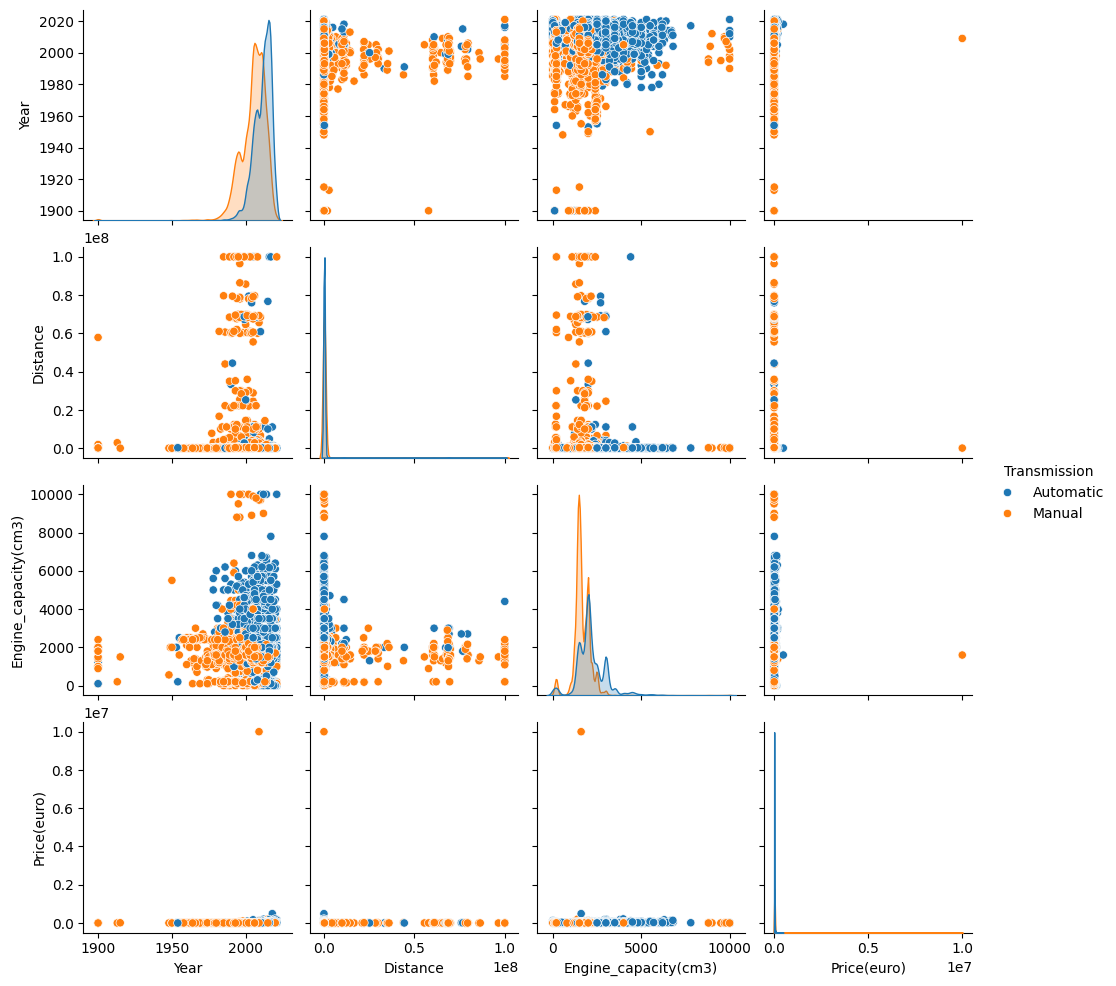

In [ ]:
sns.pairplot(data = DF, hue = 'Transmission')

# Контрольные вопросы

1.  Допустим, увас есть файл с данными, который называется 'iris. csv'. Этот файл находится в папке /data/'. Вы открываете его в текстовом редакторе и видите следующие первые строки:
sepal length in cm; sepal width in cm; petal length in cm; petal width in cm; class 5.1; 3.5; 1.4; 0.2; 0
1. Как должна выглядеть команда для считывания данных в датафрейм Pandas?
Для набора данных Cars после удаления дубликатов выберите из полного датафрейма строки с индекса 69 по 322. Отсортируйте полученный датафрейм по колонке 'Distance' по убыванию. Какое значение колонки 'Style' у полученного датафрейма во второй строке сверху?
1. Для набора данных Cars оцените количество строк, которые были удалены после анализа гистограмм распределения и удаления аномальных значений.
1. Для набора данных Cars назовите самую распространенную марку автомобилей.
1. Визуализируйте скаттерограмму для двух столбцов - Distance И Year набора данных Cars с использованием столбца Transmission в качестве цвета маркера (hue). К какому типу Transmission относится точка, которая наиболее близка к координатам (Year 1980, Distance = 500 000)?
1. 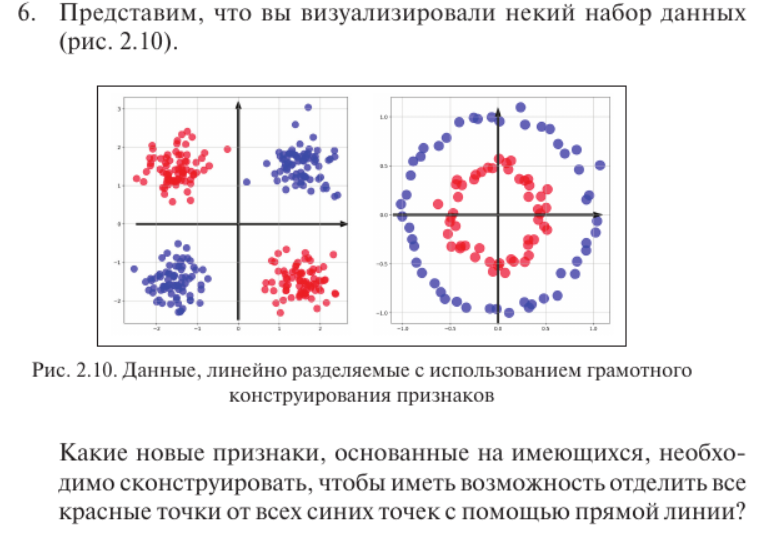

Ответы:
1. df = pd.read_csv('data/iris.csv', delimiter = ',')
1. Minivan
1. 3743 строки
1. Volkswagen 3953
1. Manual
1. Левый график - гипербола, правый - X + Y = R (формула окружности)